<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240524_roboflow_vita500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델

/content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델


In [3]:
# yolo v8를 다운 받기 위해
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.3/760.3 kB 14.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [4]:
# 라벨링 데이터 다운로드
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="AkkCvjSnAbB0yd1BEg7x")
# project = rf.workspace("vita500pjt").project("skpjt")
# version = project.version(1)
# dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to skpjt-1 in yolov8:: 100%|██████████| 218/218 [00:03<00:00, 57.97it/s]


# 모델 정의

In [5]:
from ultralytics import YOLO

In [7]:
loadedModel = YOLO(model = "yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 195MB/s]


In [21]:
imgPath = './test_set/vita500_2.jpg'

In [25]:
loadedModel(imgPath, save = True)


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita500_2.jpg: 640x640 3 bottles, 2 oranges, 14.4ms
Speed: 3.6ms preprocess, 14.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train852


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## 모델 훈련

In [24]:
#yaml path 는 반드시 절대경로로 해야함.
yaml_path = "/content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/skpjt-1/data.yaml"
# yaml 데이터 내의 train, val 의 위치가 이상하게 저장되는 경우가 있어. 그래서 그것만 수정해주자.
loadedModel.train(data= yaml_path,
            epochs = 50,
            patience = 5,
            batch = 16)

Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/skpjt-1/data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train85, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

train: Scanning /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/skpjt-1/train/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/skpjt-1/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


Plotting labels to runs/detect/train85/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train85
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.5G      0.975      1.183      1.258         17        640: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          9         19       0.98      0.684      0.892      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.29G     0.9213      1.181       1.21         17        640: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all          9         19          1      0.683      0.872      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G     0.9426      1.166      1.228         10        640: 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          9         19      0.999      0.632      0.847      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.27G     0.9657      1.154      1.267         18        640: 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          9         19      0.977      0.632      0.844       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.27G     0.9206      1.099      1.228         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all          9         19      0.999      0.684      0.897      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G     0.9014      1.112      1.182         16        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          9         19      0.839      0.826       0.92      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.27G     0.9693      1.072      1.256         13        640: 100%|██████████| 6/6 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all          9         19      0.843      0.737      0.867      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.27G     0.9733      1.094      1.223         19        640: 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          9         19          1      0.737       0.83      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G      1.037      1.128      1.214         17        640: 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          9         19      0.872      0.737      0.873      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G     0.8501       1.03      1.161         18        640: 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all          9         19      0.732      0.842      0.782      0.515
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 5, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



10 epochs completed in 0.013 hours.
Optimizer stripped from runs/detect/train85/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train85/weights/best.pt, 6.2MB

Validating runs/detect/train85/weights/best.pt...
Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


                   all          9         19      0.999      0.684      0.898      0.648
Speed: 0.7ms preprocess, 3.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train85


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e170f6abd60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [27]:
best_weight_path = './runs/detect/train85/weights/best.pt'
model = YOLO(model = best_weight_path)

In [29]:
model.predict(imgPath,save = True)


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita500_2.jpg: 640x640 3 vita500s, 11.3ms
Speed: 3.1ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'vita500'}
 obb: None
 orig_img: array([[[216, 215, 217],
         [216, 215, 217],
         [216, 215, 217],
         ...,
         [203, 204, 214],
         [205, 206, 216],
         [194, 197, 202]],
 
        [[216, 215, 217],
         [216, 215, 217],
         [216, 215, 217],
         ...,
         [203, 204, 214],
         [205, 206, 216],
         [202, 204, 212]],
 
        [[216, 215, 217],
         [216, 215, 217],
         [216, 215, 217],
         ...,
         [202, 203, 213],
         [203, 204, 214],
         [199, 201, 209]],
 
        ...,
 
        [[197, 194, 196],
         [197, 194, 196],
         [196, 193, 195],
         ...,
         [ 90,  97, 116],
         [ 90,  98, 115],
         [ 98, 105, 124]],
 
        [[198, 195, 197],
         [197, 194, 196],
         [197, 194, 196],
         ...,
         [101, 10

In [30]:
video_path = './test_set/vita_video.mp4'
model.predict(video_path,save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/280) /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita_video.mp4: 352x640 1 vita500, 110.0ms
video 1/1 (frame 2/280) /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita_video.mp4: 352x640 1 vita500, 8.6ms
video 1/1 (frame 3/280) /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita_video.mp4: 352x640 1 vita500, 8.1m

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'vita500'}
 obb: None
 orig_img: array([[[253, 254, 255],
         [253, 254, 255],
         [255, 255, 251],
         ...,
         [ 32,  69,  86],
         [ 40,  77,  94],
         [129, 166, 183]],
 
        [[250, 251, 255],
         [252, 253, 255],
         [255, 255, 252],
         ...,
         [ 32,  69,  86],
         [ 32,  69,  86],
         [ 36,  73,  90]],
 
        [[246, 252, 247],
         [251, 255, 252],
         [242, 255, 255],
         ...,
         [ 36,  73,  90],
         [ 37,  74,  91],
         [ 33,  70,  87]],
 
        ...,
 
        [[ 53, 107, 181],
         [ 53, 107, 181],
         [ 53, 107, 181],
         ...,
         [ 62, 145, 182],
         [ 64, 145, 182],
         [ 64, 145, 182]],
 
        [[ 53, 107, 181],
         [ 53, 107, 181],
         [ 53, 107, 181],
         ...,
         [ 62, 14

## 모델 세부 수정

In [31]:
model = YOLO(model = 'yolov8n.pt')

In [32]:
result = model.predict(imgPath)[0]


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita500_2.jpg: 640x640 3 bottles, 2 oranges, 16.5ms
Speed: 5.4ms preprocess, 16.5ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)


array([[[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [203, 204, 214],
        [205, 206, 216],
        [194, 197, 202]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [203, 204, 214],
        [205, 206, 216],
        [202, 204, 212]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [202, 203, 213],
        [203, 204, 214],
        [199, 201, 209]],

       ...,

       [[197, 194, 196],
        [197, 194, 196],
        [196, 193, 195],
        ...,
        [ 90,  97, 116],
        [ 90,  98, 115],
        [ 98, 105, 124]],

       [[198, 195, 197],
        [197, 194, 196],
        [197, 194, 196],
        ...,
        [101, 109, 126],
        [101, 109, 126],
        [109, 116, 135]],

       [[192, 189, 191],
        [199, 196, 198],
        [183, 180, 182],
        ...,
        [114, 120, 139],
        [116, 122, 141],
        [113, 120, 137]]], dtype=uint8)
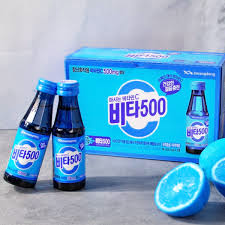

In [33]:
result.orig_img

array([[[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [203, 204, 214],
        [205, 206, 216],
        [194, 197, 202]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [203, 204, 214],
        [205, 206, 216],
        [202, 204, 212]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [202, 203, 213],
        [203, 204, 214],
        [199, 201, 209]],

       ...,

       [[197, 194, 196],
        [197, 194, 196],
        [196, 193, 195],
        ...,
        [ 90,  97, 116],
        [ 90,  98, 115],
        [ 98, 105, 124]],

       [[198, 195, 197],
        [197, 194, 196],
        [197, 194, 196],
        ...,
        [101, 109, 126],
        [101, 109, 126],
        [109, 116, 135]],

       [[192, 189, 191],
        [199, 196, 198],
        [183, 180, 182],
        ...,
        [114, 120, 139],
        [116, 122, 141],
        [113, 120, 137]]], dtype=uint8)
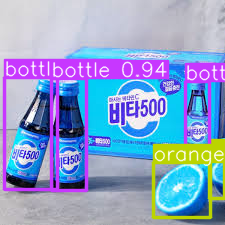

In [34]:
result.plot()

In [42]:
import cv2
import matplotlib.pyplot as plt

In [49]:
model_names = model.names

In [51]:
model_names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/code2024/Session13 - 객체인식모델/test_set/vita500_2.jpg: 640x640 3 bottles, 2 oranges, 16.9ms
Speed: 3.1ms preprocess, 16.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


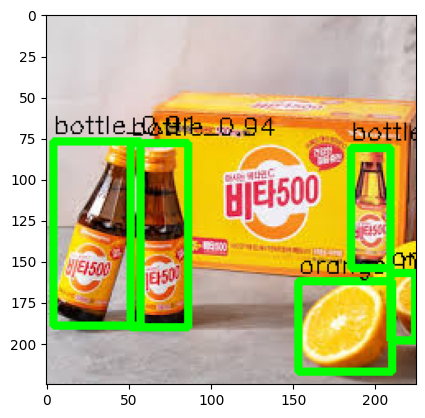

In [69]:
img_path = './test_set/vita500_2.jpg'
detection = model(img_path)[0]
boxinfos = detection.boxes.data.tolist()
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
for data in boxinfos :
    x1,y1,x2,y2 = map(int,data[:4])
    confidence_score = round(data[4],2)
    classid = int(data[5])
    name = model_names[classid]
    model_text = f'{name}_{confidence_score}'
    cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),3)
    cv2.putText(img,
                text= model_text,
                org = (x1, y1 - 5),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale  = 0.5,
                color = (0,0,0),
                thickness = 1)
plt.imshow(img)


In [85]:

cap = cv2.VideoCapture(video_path)
cnt = 0

# 코덱
fcc = cv2.VideoWriter_fourcc(*'FMP4')
video = cv2.VideoWriter("vita_cf_cnt",fourcc = fcc, fps =30, frameSize = (352,640))
while cap.isOpened():
    # ret : error 여부 , frame : 이미지
    ret, frame = cap.read()
    if not ret :
        break
    detection = model(frame)[0]
    boxinfos = detection.boxes.data.tolist()
    img = cv2.cvtColor(detection.orig_img,cv2.COLOR_BGR2RGB)
    for data in boxinfos :
        x1,y1,x2,y2 = map(int,data[:4])
        confidence_score = round(data[4],2)
        classid = int(data[5])
        name = model_names[classid]
        model_text = f'{name}_{confidence_score}'
        cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),3)
        cv2.putText(img,
                    text= model_text,
                    org = (x1, y1 - 5),
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale  = 0.5,
                    color = (0,0,0),
                    thickness = 1)
    video.write(img)
video.release()


0: 352x640 1 bottle, 32.5ms
Speed: 3.1ms preprocess, 32.5ms inference, 159.0ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 13.9ms
Speed: 3.7ms preprocess, 13.9ms inference, 2.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 14.1ms
Speed: 3.8ms preprocess, 14.1ms inference, 2.3ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 2.2ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 1 remote, 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 1 remote, 6.9ms
Speed: 2.9ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 1 remote, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 bottle, 1 remote, 8.9ms
Speed: 3.0ms preprocess, 8.9ms inference, 1.4ms postpr

In [84]:
boxinfo = boxinfos[0].boxes.data.tolist()
len(boxinfo[0])

6